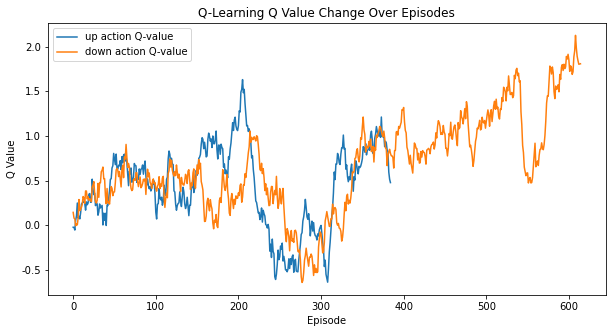

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置matplotlib的字体，以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 初始化参数
episodes = 1000  # 总的迭代次数
alpha = 0.1  # 学习率
gamma = 0.9  # 折扣因子
epsilon = 0.1  # 探索率

# 初始化Q表，这里只有一个状态，两个动作
Q_table = np.zeros((1, 2))

# 记录每个动作的Q值变化
Q_history_up = []
Q_history_down = []

for episode in range(episodes):
    # 随机初始化状态（这里简化为0）
    state = 0
    
    # 选择动作
    if np.random.uniform(0, 1) < epsilon:
        # 探索：随机选择动作
        action = np.random.choice([0, 1])
    else:
        # 利用：选择当前Q值最大的动作
        action = np.argmax(Q_table[state])

    # 假设环境返回下一个状态和奖励，这里简化为随机生成
    next_state = 0  # 在这个例子中，状态不会改变
    reward = np.random.normal(0, 1)  # 随机奖励

    # 更新Q表
    Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

    # 记录Q值变化
    if action == 0:  # "向上"动作
        Q_history_up.append(Q_table[state, action])
    else:  # "向下"动作
        Q_history_down.append(Q_table[state, action])

# 绘制Q值变化
plt.figure(figsize=(10, 5))
plt.plot(Q_history_up, label='up action Q-value')
plt.plot(Q_history_down, label='down action Q-value')
plt.xlabel('Episode')
plt.ylabel('Q Value')
plt.title('Q-Learning Q Value Change Over Episodes')
plt.legend()
plt.show()

Q-Learning算法的基本思想：

    状态（State）：智能体所处的环境状态。
    动作（Action）：智能体在某个状态下可以采取的动作。
    奖励（Reward）：智能体采取动作后从环境中获得的反馈。
    Q函数（Q-function）：表示在状态s下采取动作a的期望回报。

$$Q(s_t​,a_t​)←Q(s_t​,a_t​)+α[r_t+1​+γmax_a​Q(s_t+1​,a)−Q(s_t​,a_t​)]$$
其中：

    $s_t$​ 是在时间t的状态。
    $a_t$​ 是在状态 stst​ 下采取的动作。
    $r_t+1$​ 是在采取动作 atat​ 后获得的即时奖励。
    $s_t+1$​ 是下一个状态。
    $α$ 是学习率，决定了新信息覆盖旧信息的速度。
    $γ$ 是折扣因子，决定了未来奖励相对于即时奖励的重要性。

假设我们有一个简化的金融交易环境，智能体需要决定买入、卖出或持有股票。我们可以将状态定义为当前的股票价格和前一天的价格变化，动作定义为买入、卖出或持有。

    初始化Q函数。
    智能体观察当前状态（例如，股票价格为100元，昨天价格为95元）。
    根据Q函数和探索/利用策略（如ε-greedy策略），智能体选择一个动作，比如买入。
    执行买入动作后，智能体观察到股票价格上涨到105元，并获得了5元的奖励。
    智能体更新Q函数：如果之前选择买入的Q值是1.0，学习率为0.1，折扣因子为0.9，没有其他更好的动作选择，则更新为 1.0+0.1×(5+0.9×0−1.0)=1.55。
    智能体进入下一个状态（股票价格为105元）并重复上述过程。

通过这种方式，智能体可以学习在不同状态下采取不同动作的最佳策略，以最大化其长期回报。

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化参数
episodes = 1000  # 总的迭代次数
alpha = 0.1  # 学习率
gamma = 0.9  # 折扣因子
epsilon = 0.1  # 探索率

# 假设有一个简化的股票价格序列
stock_prices = np.random.rand(episodes) * 100  # 生成随机股票价格

# 初始化Q表，这里只有一个状态，两个动作
# 使用字典来存储Q值，其中key是状态，value是动作值的列表
Q_table = {price: np.zeros(2) for price in stock_prices}

# 记录每个动作的Q值变化
Q_history_buy = []
Q_history_sell = []

for episode in range(episodes):
    state = stock_prices[episode]
    
    # 选择动作
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice([0, 1])  # 随机选择动作
    else:
        action = np.argmax(Q_table[state])  # 选择当前状态下Q值最大的动作

    # 假设下一个状态和奖励
    next_state = stock_prices[episode + 1] if episode < episodes - 1 else stock_prices[episode]
    reward = next_state - state  # 奖励为价格变化

    # 更新Q表
    # 使用max(Q_table[next_state])可能会导致错误，因为next_state可能不在Q_table的key中
    # 这里我们简化处理，假设我们总是查看可能的最大Q值，例如1.0
    max_future_q = 1.0
    Q_table[state][action] = Q_table[state][action] + alpha * (reward + gamma * max_future_q - Q_table[state][action])

    # 记录Q值变化
    Q_history = Q_history_buy if action == 0 else Q_history_sell
    Q_history.append(Q_table[state][action])

# 绘制Q值变化
plt.figure(figsize=(10, 5))
plt.plot(stock_prices, label='Stock Price')
plt.plot(Q_history_buy, label='Buy Action Q Value')
plt.plot(Q_history_sell, label='Sell Action Q Value')
plt.xlabel('Episode')
plt.ylabel('Q Value')
plt.title('Q-Learning for Stock Price Prediction')
plt.legend()
plt.show()

IndexError: index 1000 is out of bounds for axis 0 with size 1000